# HW6
Student name: PENG, Han
Student ID: 21035814

In [5]:
# Load face data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh
from scipy.io import loadmat

# Load the face data from the .mat file
face_data = loadmat('face.mat')
Y = face_data['Y']  # Assuming Y is the key for the images
ids = face_data['id'].flatten()  # Assuming id is the key for the ground truth labels

# Reshape Y to a list of 2D arrays, one for each image
num_images = Y.shape[2]
faces = [Y[:, :, i] for i in range(num_images)]


# Problem 1

## (a) MDS (random_state=42)

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS Ordering: [ 8  9 10  6  5  7 11  4 12  3 13  2 14  1 15 16 17 18 20 19 21 22 23 24
 30 29 31 33 32 28 25 26 27]
Ground Truth Ordering: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


Kendall's Tau: 0.712
P-value: 0.000


Ordered Faces by MDS


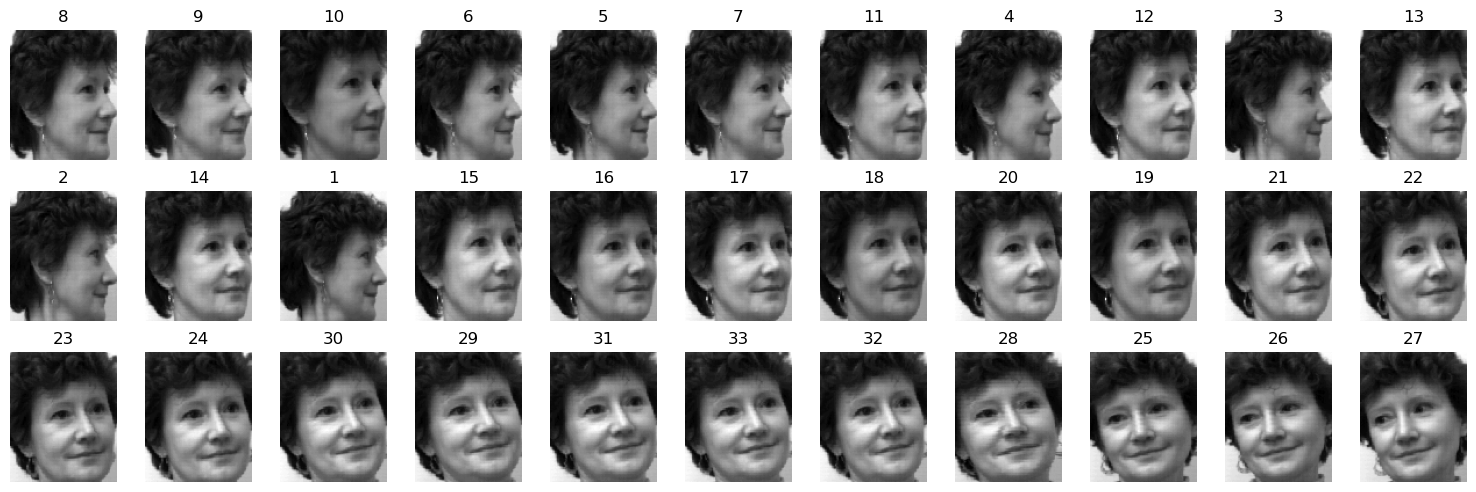

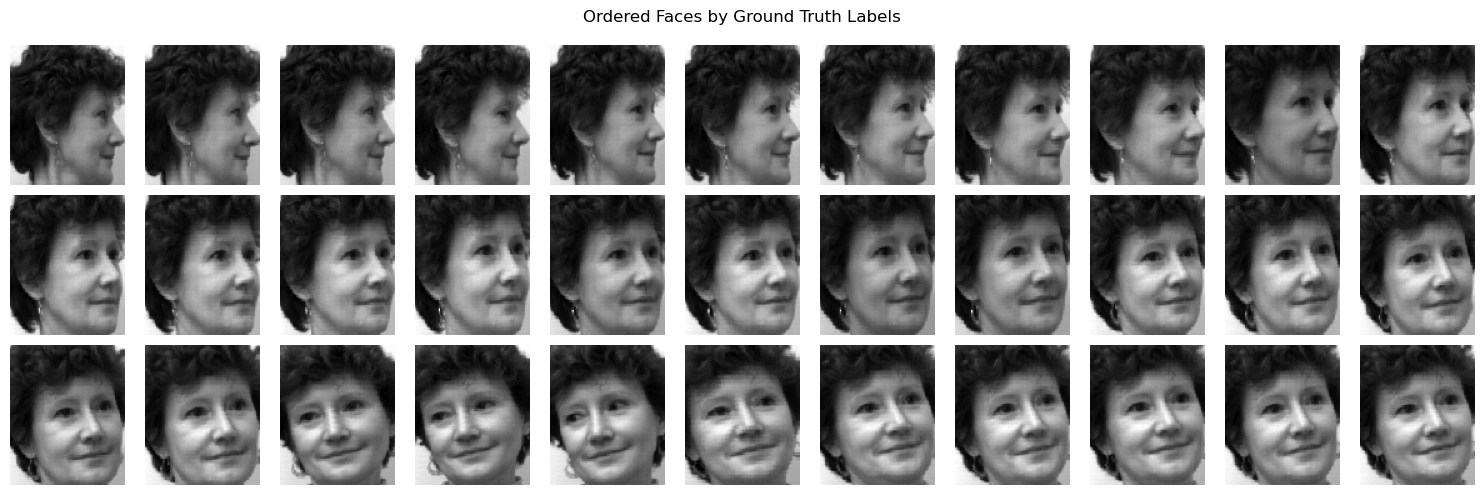

In [6]:
# MDS (random_state=42)
from sklearn.manifold import MDS
from scipy.stats import kendalltau

# Reshape Y to a 2D array where each row is a flattened image
num_images = Y.shape[2]
faces = np.array([Y[:, :, i].flatten() for i in range(num_images)])

# Initialize the MDS object
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42)

# Fit the MDS to your data (flattened images)
mds_embedding = mds.fit_transform(faces)

# Sorting the images by the first MDS component
sorted_indices_mds = np.argsort(mds_embedding[:, 0])
sorted_faces_mds = faces[sorted_indices_mds]

# Get the ordering of the ground truth labels
ordered_indices_ground_truth = np.argsort(ids)
ordered_faces_ground_truth = [faces[i] for i in ordered_indices_ground_truth]


order_MDS = ids[sorted_indices_mds]
order_G = ids[np.argsort(ids)]

# Compare with ground truth
print("MDS Ordering:", order_MDS)
print("Ground Truth Ordering:", order_G)


# Calculate Kendall's Tau of different methods
# diffusion maps
tau, p_value = kendalltau(order_MDS, order_G)
#print('Difussion maps')
print('\n')
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')


# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face, order in zip(axes, sorted_faces_mds, order_MDS):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(order))
#plt.suptitle()  # Use suptitle for the entire figure
print('Ordered Faces by MDS')
plt.savefig('MDS_rand42.png', bbox_inches='tight', dpi=300)
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()



# Plot ordered faces by ground truth labels in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face in zip(axes, ordered_faces_ground_truth):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')

plt.suptitle('Ordered Faces by Ground Truth Labels')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


## (a) MDS (random_state=100)

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


MDS Ordering: [ 1  2  4  3  5  6  7  8 23  9 24 33 11 32 22 30 31 12 10 29 20 13 21 17
 14 16 18 15 27 19 26 25 28]
Ground Truth Ordering: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


Kendall's Tau: 0.439
P-value: 0.000


Ordered Faces by MDS


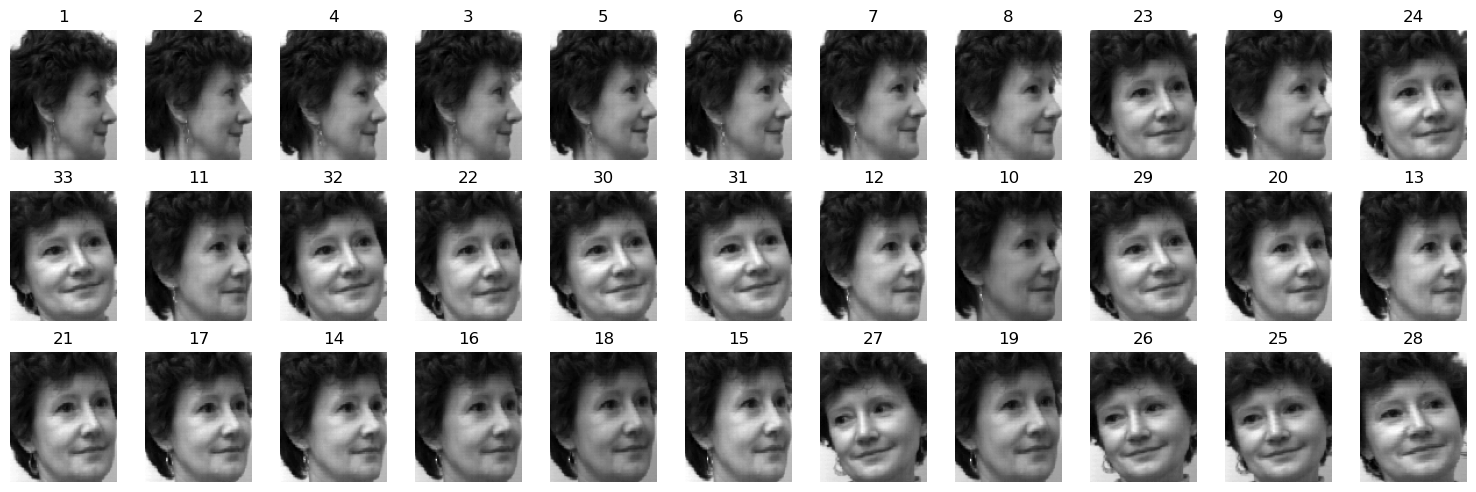

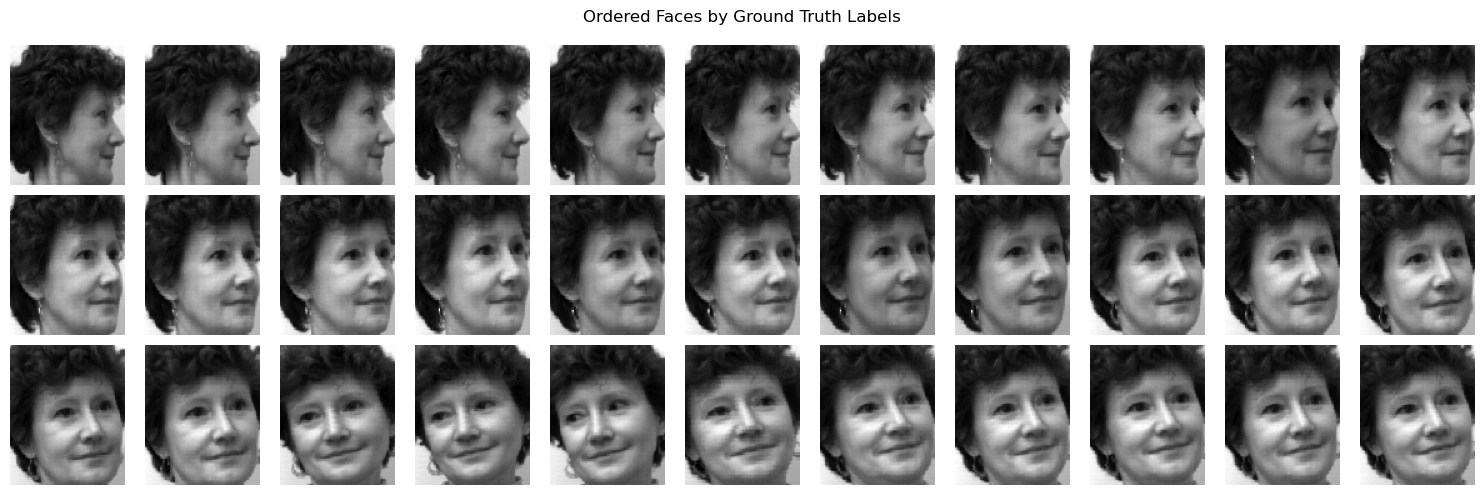

In [7]:
# MDS (random_state=100)
from sklearn.manifold import MDS

# Reshape Y to a 2D array where each row is a flattened image
num_images = Y.shape[2]
faces = np.array([Y[:, :, i].flatten() for i in range(num_images)])

# Initialize the MDS object
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=100)

# Fit the MDS to your data (flattened images)
mds_embedding = mds.fit_transform(faces)

# Sorting the images by the first MDS component
sorted_indices_mds = np.argsort(mds_embedding[:, 0])
#print(sorted_indices_mds)
sorted_indices_mds = sorted_indices_mds[::-1]
#print(sorted_indices_mds)
sorted_faces_mds = faces[sorted_indices_mds]


order_MDS = ids[sorted_indices_mds]
order_G = ids[np.argsort(ids)]

# Compare with ground truth
print("MDS Ordering:", order_MDS)
print("Ground Truth Ordering:", order_G)


# Calculate Kendall's Tau of different methods
# diffusion maps
tau, p_value = kendalltau(order_MDS, order_G)
#print('Difussion maps')
print('\n')
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')


# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face, order in zip(axes, sorted_faces_mds, order_MDS):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(order))
#plt.suptitle()  # Use suptitle for the entire figure
print('Ordered Faces by MDS')
plt.savefig('MDS_rand100.png', bbox_inches='tight', dpi=300)
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()



# Plot ordered faces by ground truth labels in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for ax, face in zip(axes, ordered_faces_ground_truth):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')

plt.suptitle('Ordered Faces by Ground Truth Labels')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


## (a) MDS with 100 runs

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalize

Average MDS Ordering: [10 12 13 11 14  4 28  5 15  6  8  3  7  9 16 17 25  1  2 33 19 18 22 21
 26 20 30 32 24 23 27 31 29]
Ground Truth Ordering: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


Kendall's Tau: 0.477
P-value: 0.000




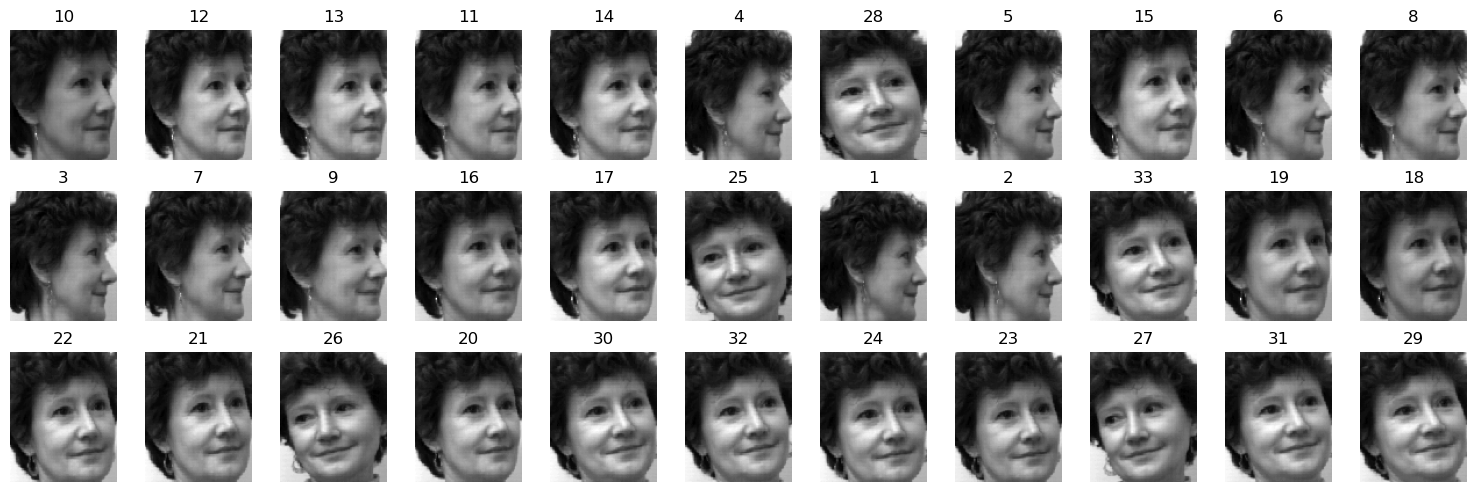

In [8]:
# MDS with 100 runs
# Initialize the Borda count scores
borda_counts = np.zeros(num_images)

# Run MDS with 100 different random seeds and update Borda counts
for seed in range(100):
    mds = MDS(n_components=2, dissimilarity='euclidean', random_state=seed)
    mds_embedding = mds.fit_transform(faces)
    sorted_indices_mds = np.argsort(mds_embedding[:, 0])
    
    # Update Borda counts (higher index gets lower score)
    for idx, image_index in enumerate(sorted_indices_mds):
        borda_counts[image_index] += (num_images - idx - 1)

# Get the ordering of the ground truth labels
ordered_indices_ground_truth = np.argsort(ids)
ordered_faces_ground_truth = [faces[i] for i in ordered_indices_ground_truth]

# Rank images based on Borda count scores
average_order_indices_MDS = np.argsort(-borda_counts)

order_MDS= ids[average_order_indices_MDS]
order_G = ids[ordered_indices_ground_truth]

print("Average MDS Ordering:", order_MDS)
print("Ground Truth Ordering:", order_G)

# Calculate Kendall's Tau of different methods
# diffusion maps
tau, p_value = kendalltau(order_MDS, order_G)
#print('Difussion maps')
print('\n')
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')




# Plot the ordered faces in a 3x11 grid based on the average order
fig, axes = plt.subplots(3, 11, figsize=(15, 5))
axes = axes.flatten()

for ax, idx, order  in zip(axes, average_order_indices_MDS, order_MDS):
    ax.imshow(faces[idx].reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(order))

#plt.suptitle('Ordered Faces by Average MDS Ranking')
plt.tight_layout()
plt.savefig('average_mds_ordering.png', bbox_inches='tight', dpi=300)
plt.show()

## (b) ISOMAP



Kendall's Tau: 0.894
P-value: 0.000




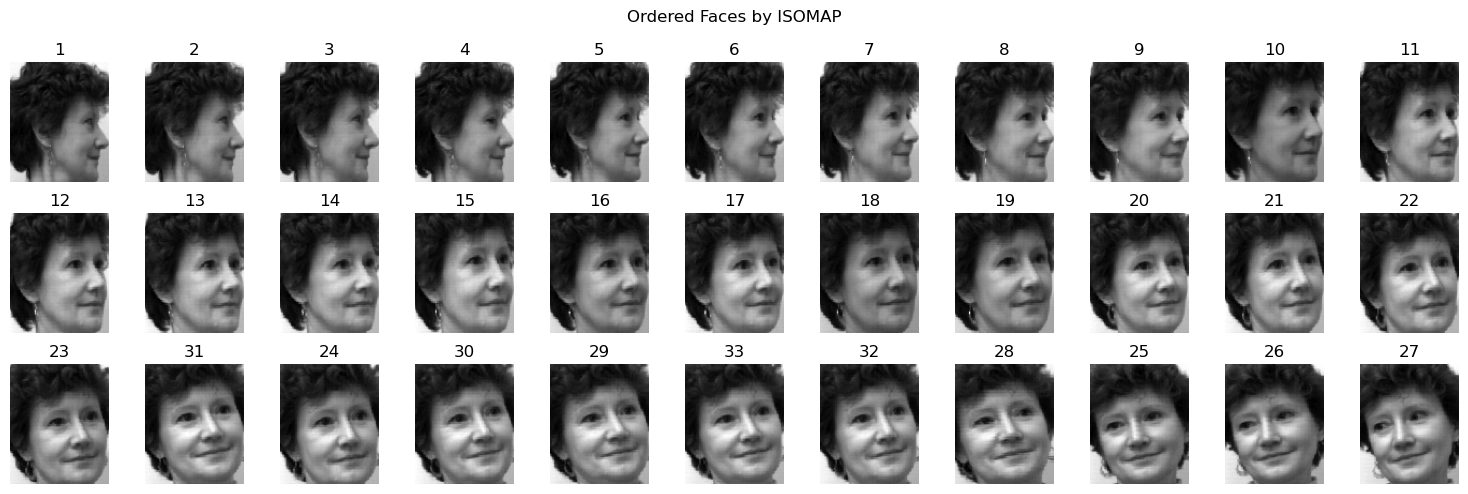

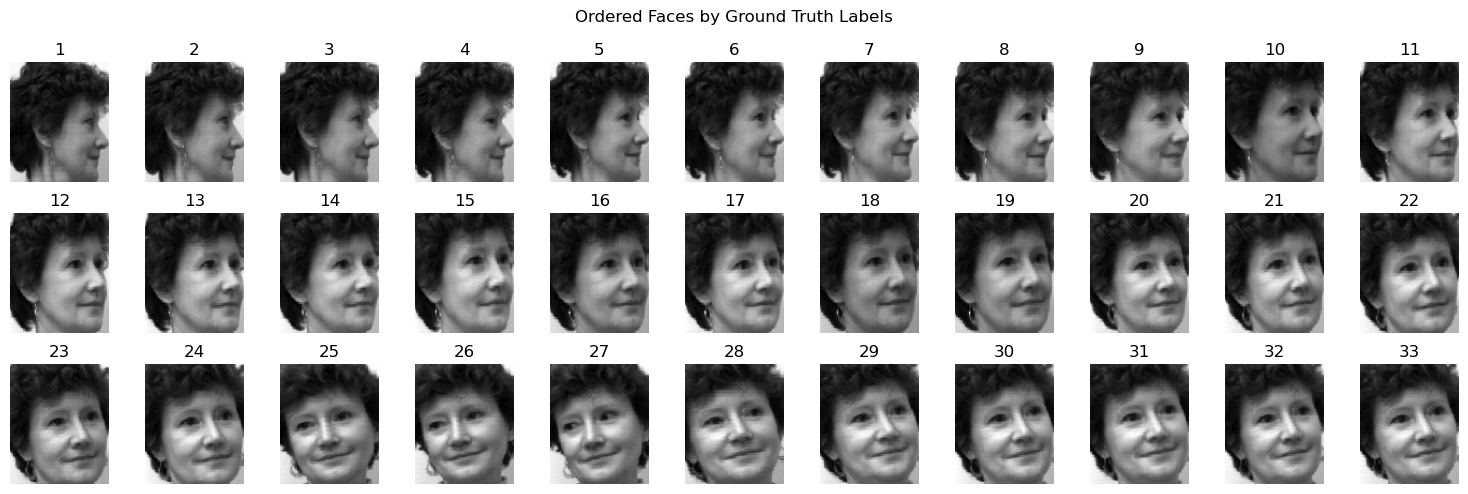

In [11]:
from sklearn.manifold import Isomap
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import numpy as np

# Reshape Y to a 2D array where each row is a flattened image
num_images = Y.shape[2]
faces = np.array([Y[:, :, i].flatten() for i in range(num_images)])


# Implement ISOMAP with 5 nearest neighbors
iso = Isomap(n_neighbors=5)
iso_embedding = iso.fit_transform(faces)

# Sorting the images by the first ISOMAP component
sorted_indices_iso = np.argsort(iso_embedding[:, 0])
sorted_faces_iso = faces[sorted_indices_iso]

# Reverse the array so the last image comes first
sorted_faces_iso = sorted_faces_iso[::-1]
sorted_indices_iso = sorted_indices_iso[::-1]


# Order faces according to ground truth labels
ordered_indices_ground_truth = np.argsort(ids)
ordered_faces_ground_truth = faces[ordered_indices_ground_truth]



order_iso = ids[sorted_indices_iso]
order_G = ids[np.argsort(ids)]


# Calculate Kendall's Tau of different methods
# diffusion maps
tau, p_value = kendalltau(order_iso, order_G )
#print('Difussion maps')
print('\n')
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')



# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, (ax, face) in enumerate(zip(axes, sorted_faces_iso)):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(ids[sorted_indices_iso[i]]))  # Add order number to title

plt.suptitle('Ordered Faces by ISOMAP')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

# Plot the original (ground truth) order of faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, (ax, face) in enumerate(zip(axes, ordered_faces_ground_truth)):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(ids[ordered_indices_ground_truth[i]]))  # Add order number to title

plt.suptitle('Ordered Faces by Ground Truth Labels')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure

We can see that ISOMAP gives much better results than MDS, as it considers the nonlinear embedding of the original data.
The result is not 100% accurate as the ground truth label is not monotonically turning to one direction.

## (c) LLE/MLLE



lle
Kendall's Tau: 0.902
P-value: 0.000




mlle
Kendall's Tau: 0.894
P-value: 0.000




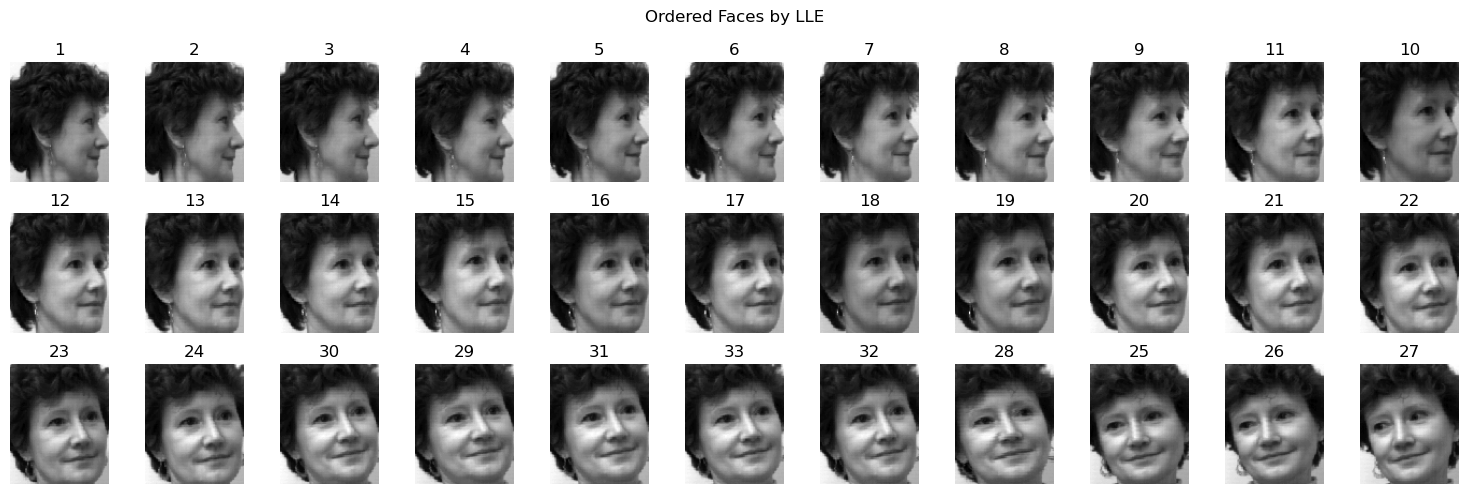

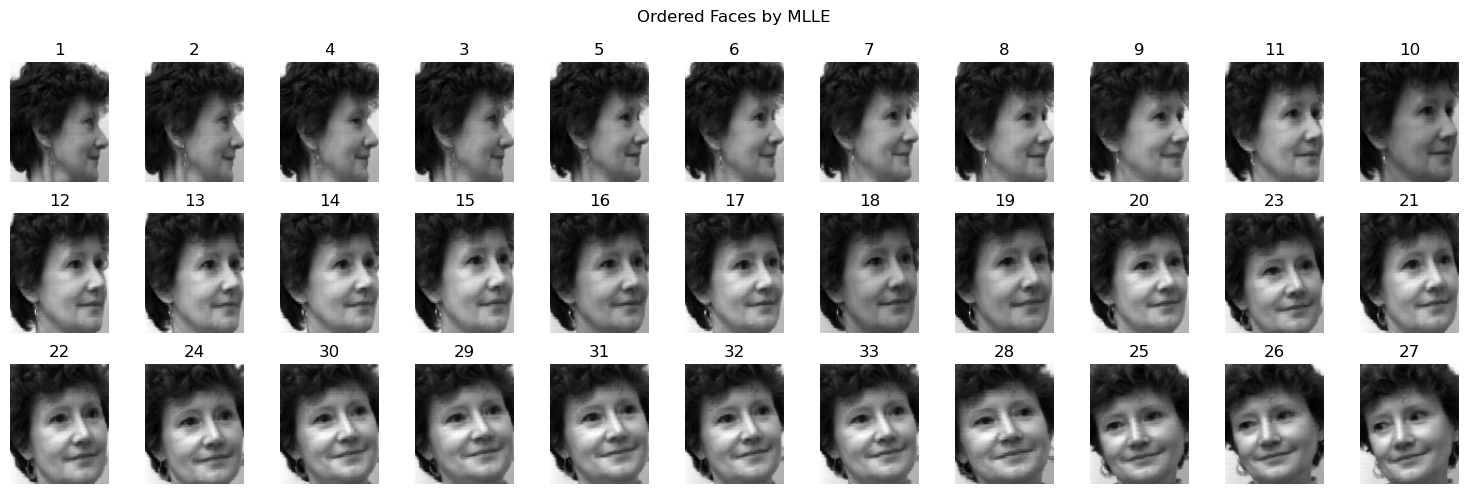

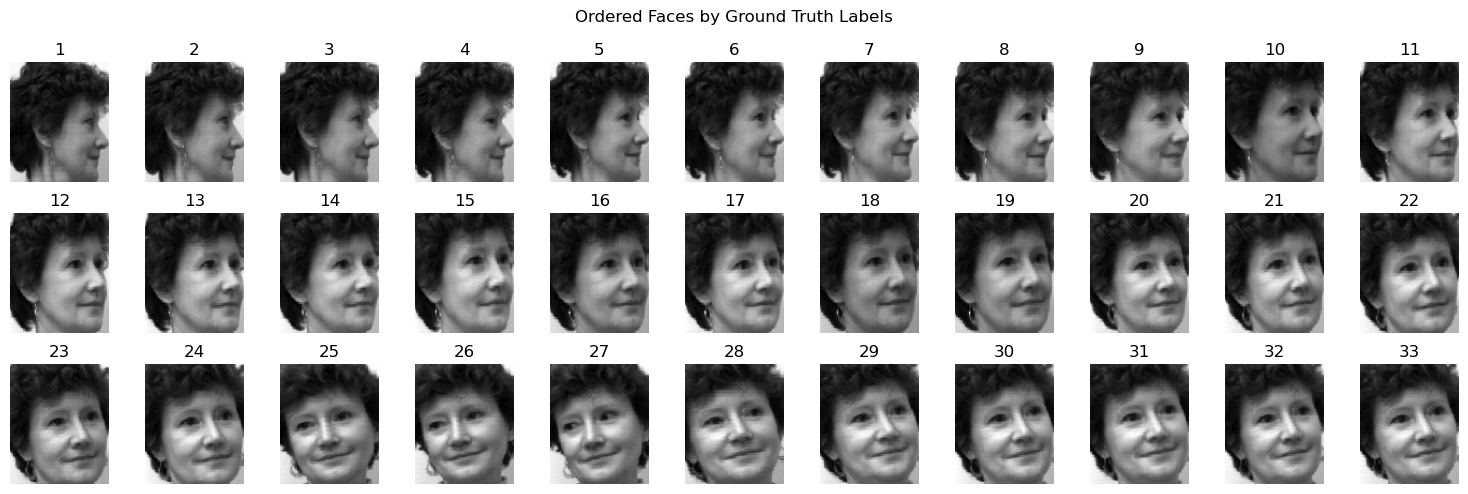

In [15]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
import numpy as np

# Flatten each 2D image into a 1D array and stack them into a 2D array
faces = np.array([face.flatten() for face in faces])

# Implement LLE with 5 nearest neighbors
lle = LocallyLinearEmbedding(n_neighbors=5, method='standard')
lle_embedding  = lle.fit_transform(faces)

# Sorting the images by the first LLE component
sorted_indices_lle = np.argsort(lle_embedding[:, 0])
sorted_faces_lle = faces[sorted_indices_lle]


# Implement MLLE with 5 nearest neighbors
mlle = LocallyLinearEmbedding(n_neighbors=5, method='modified')
mlle_embedding = mlle.fit_transform(faces)


# Sorting the images by the first MLLE component
sorted_indices_mlle = np.argsort(mlle_embedding[:, 0])
sorted_faces_mlle = faces[sorted_indices_mlle]
sorted_faces_mlle = sorted_faces_mlle[::-1]
sorted_indices_mlle = sorted_indices_mlle[::-1]

order_lle= ids[sorted_indices_lle]
order_mlle= ids[sorted_indices_mlle]
order_G = ids[np.argsort(ids)]



# Calculate Kendall's Tau of different methods
# lle
tau, p_value = kendalltau(order_lle, order_G)
print('\n')
print('lle')
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')

# Calculate Kendall's Tau of different methods
# mlle
print('\n')
print('mlle')
tau, p_value = kendalltau(order_mlle, order_G)
print(f"Kendall's Tau: {tau:.3f}")
print(f"P-value: {p_value:.3f}")
print('\n')


# lle
# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, (ax, face) in enumerate(zip(axes, sorted_faces_lle)):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(ids[sorted_indices_lle[i]]))  # Add order number to title

plt.suptitle('Ordered Faces by LLE')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()


# mlle
# Plot the ordered faces in a 3x11 grid 
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, (ax, face) in enumerate(zip(axes, sorted_faces_mlle)):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(ids[sorted_indices_mlle[i]]))  # Add order number to title

plt.suptitle('Ordered Faces by MLLE')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()



# Plot the original (ground truth) order of faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, (ax, face) in enumerate(zip(axes, ordered_faces_ground_truth)):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(ids[ordered_indices_ground_truth[i]]))  # Add order number to title

plt.suptitle('Ordered Faces by Ground Truth Labels')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure

We can see that LLE/MLLE has very similar results to ISOMAP, as they both consider the nonlinear embedding of the original data. THe LLE achieves the best scores.
Again, the result is not 100% accurate as the ground truth label is not monotonically turning to one direction.

# Problem 2

We use python to generate the dataset and do the dimensionality reduction.
We found that processing Punctured Sphere takes lots of memory so we skipped this dataset.
From the results we can see that lle and ltsa have the best performance and can decompose the dataset into  a linear pattern, so the cluster is done automatically.

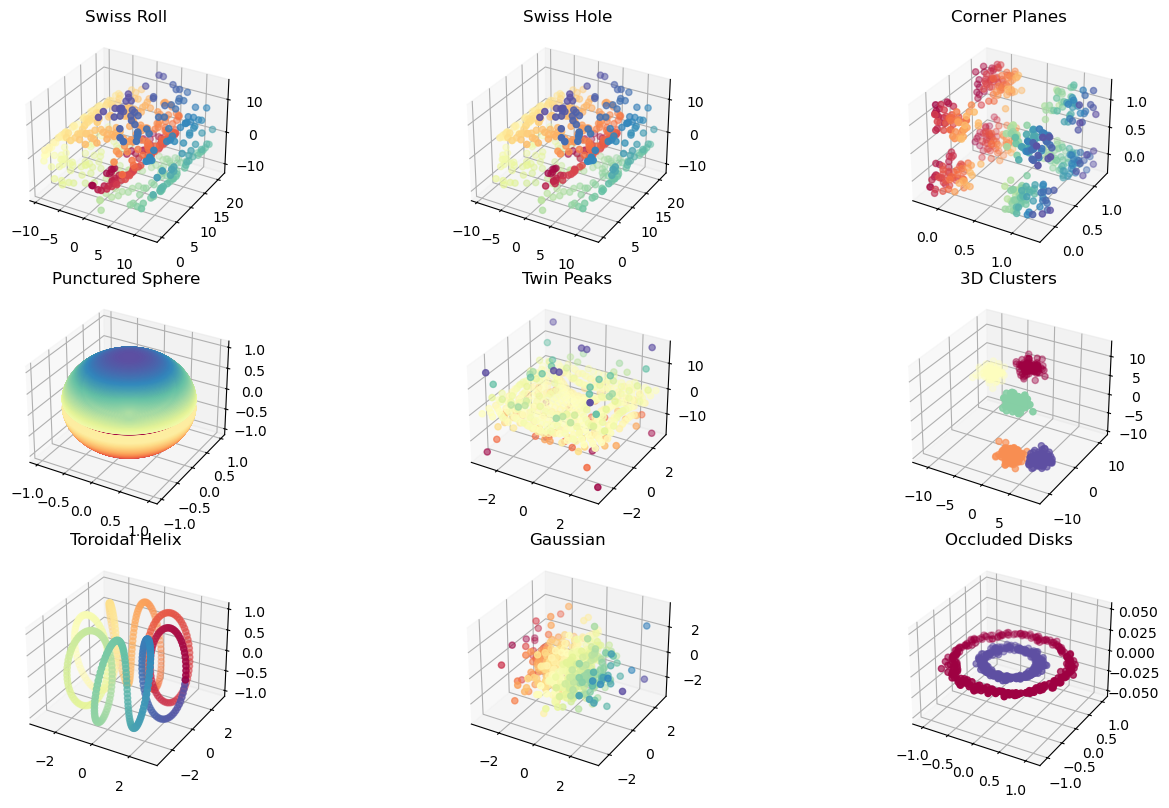

In [26]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Parameters for the datasets
n_points = 500
noise_level = 0.05

# (a) Swiss roll with color based on the second feature
X_swiss_roll, color_swiss_roll = datasets.make_swiss_roll(n_samples=n_points, noise=noise_level)

# (b) Swiss hole (Swiss roll with a hole) with the same color mapping
hole_radius = 5
mask = np.sqrt(X_swiss_roll[:, 1]**2 + X_swiss_roll[:, 2]**2) > hole_radius
X_swiss_hole = X_swiss_roll[mask]
color_swiss_hole = color_swiss_roll[mask]

# (c) Corner Planes
X_corner_planes = np.random.rand(n_points, 3)
X_corner_planes = np.where(X_corner_planes < 0.5, X_corner_planes - 0.25, X_corner_planes + 0.25)
color_corner_planes = X_corner_planes[:, 0]  # Color based on first feature

# (d) Punctured Sphere
# Create a sphere and color based on height (z-coordinate)
phi = np.linspace(0, np.pi, n_points)
theta = np.linspace(0, 2 * np.pi, n_points)
phi, theta = np.meshgrid(phi, theta)
r = 1
X_sphere = np.array([r * np.sin(phi) * np.cos(theta), r * np.sin(phi) * np.sin(theta), r * np.cos(phi)]).reshape(3, -1).T
mask = (X_sphere[:, 2] < -0.1) | (X_sphere[:, 2] > 0.1)
X_punctured_sphere = X_sphere[mask]
color_punctured_sphere = X_punctured_sphere[:, 2]  # Color based on z-coordinate


# (e) Twin Peaks
x, y = np.meshgrid(np.linspace(-3, 3, int(np.sqrt(n_points))), np.linspace(-3, 3, int(np.sqrt(n_points))))
Z_twin_peaks = np.tan(x**2 - y**2)
X_twin_peaks = np.c_[x.ravel(), y.ravel(), Z_twin_peaks.ravel()]
color_twin_peaks = Z_twin_peaks.ravel()  # Color based on the z-coordinate

# (f) 3D Clusters
X_clusters, cluster_labels = datasets.make_blobs(n_samples=n_points, centers=5, n_features=3, random_state=42)
color_clusters = cluster_labels  # Color based on cluster labels

# (g) Toroidal Helix
theta = np.linspace(0, 2 * np.pi, n_points)
r = 2 + np.cos(8 * theta)
X_toroidal_helix = np.c_[r * np.cos(theta), r * np.sin(theta), np.sin(8 * theta)]
color_toroidal_helix = theta  # Color based on the angle theta

# (h) Gaussian
X_gaussian, _ = datasets.make_gaussian_quantiles(n_samples=n_points, n_features=3, n_classes=1)
color_gaussian = X_gaussian[:, 0]  # Color based on the first feature

# (i) Occluded Disks
X_occluded_disks, disk_labels = datasets.make_circles(n_samples=n_points, factor=0.5, noise=noise_level)
color_occluded_disks = disk_labels  # Color based on the inner or outer circle

# Visualize the datasets
datasets_list = [X_swiss_roll, X_swiss_hole, X_corner_planes, X_punctured_sphere,
                 X_twin_peaks, X_clusters, X_toroidal_helix, X_gaussian, X_occluded_disks]
titles = ['Swiss Roll', 'Swiss Hole', 'Corner Planes', 'Punctured Sphere',
          'Twin Peaks', '3D Clusters', 'Toroidal Helix', 'Gaussian', 'Occluded Disks']
colors_list = [color_swiss_roll, color_swiss_hole, color_corner_planes, 
               color_punctured_sphere,color_twin_peaks, color_clusters, color_toroidal_helix, 
               color_gaussian, color_occluded_disks]

fig = plt.figure(figsize=(15, 8))
for i, (X, colors, title) in enumerate(zip(datasets_list, colors_list, titles), start=1):
    ax = fig.add_subplot(3, 3, i, projection='3d')
    if X.shape[1] == 3:
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, cmap=plt.cm.Spectral)  # For 3D datasets
    elif X.shape[1] == 2:
        ax.scatter(X[:, 0], X[:, 1], np.zeros(X.shape[0]), c=colors, cmap=plt.cm.Spectral)  # For 2D datasets, add a third dimension as 0
    ax.title.set_text(title)
plt.tight_layout()
plt.show()

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


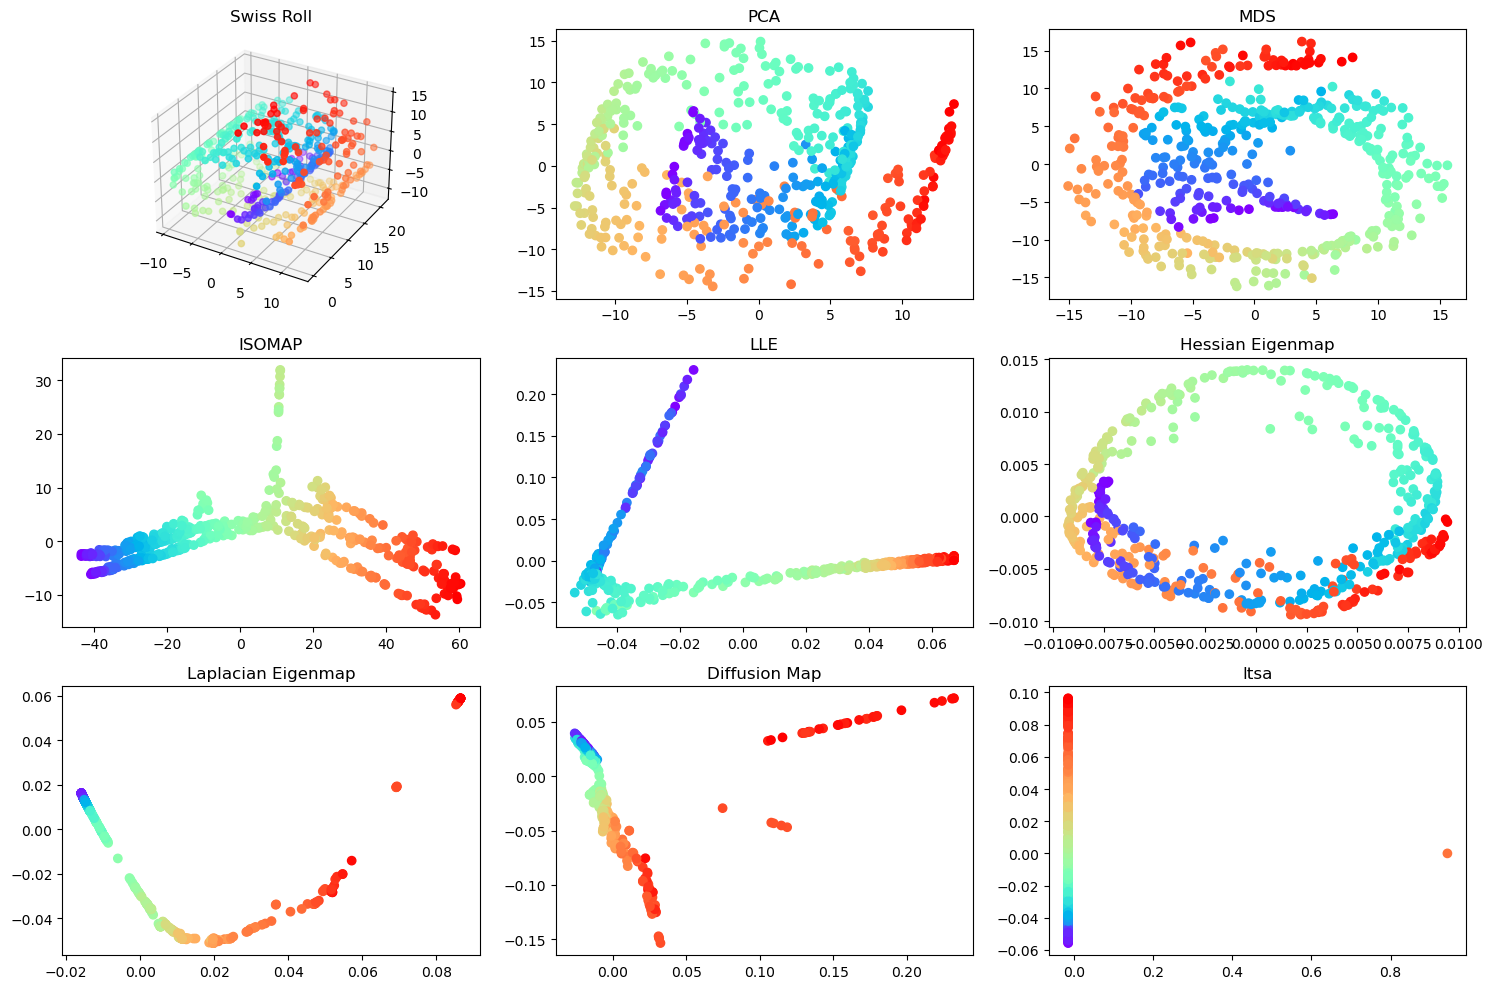

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


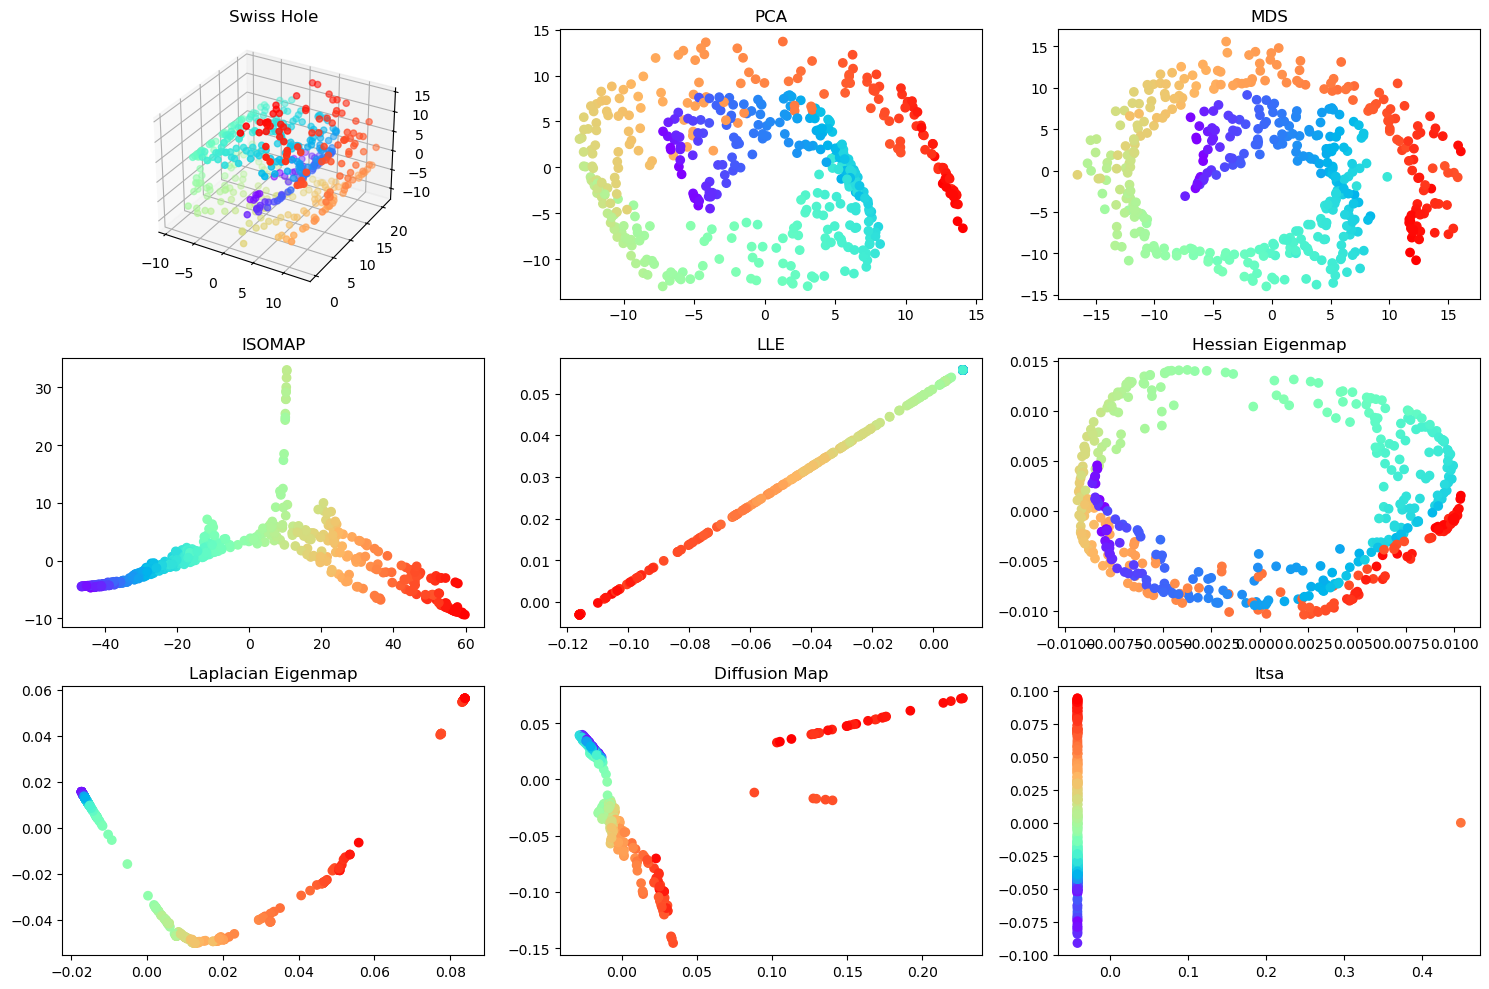

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 8 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\f\anaconda\envs\mdn\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\f\anaconda\envs\mdn\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\f\

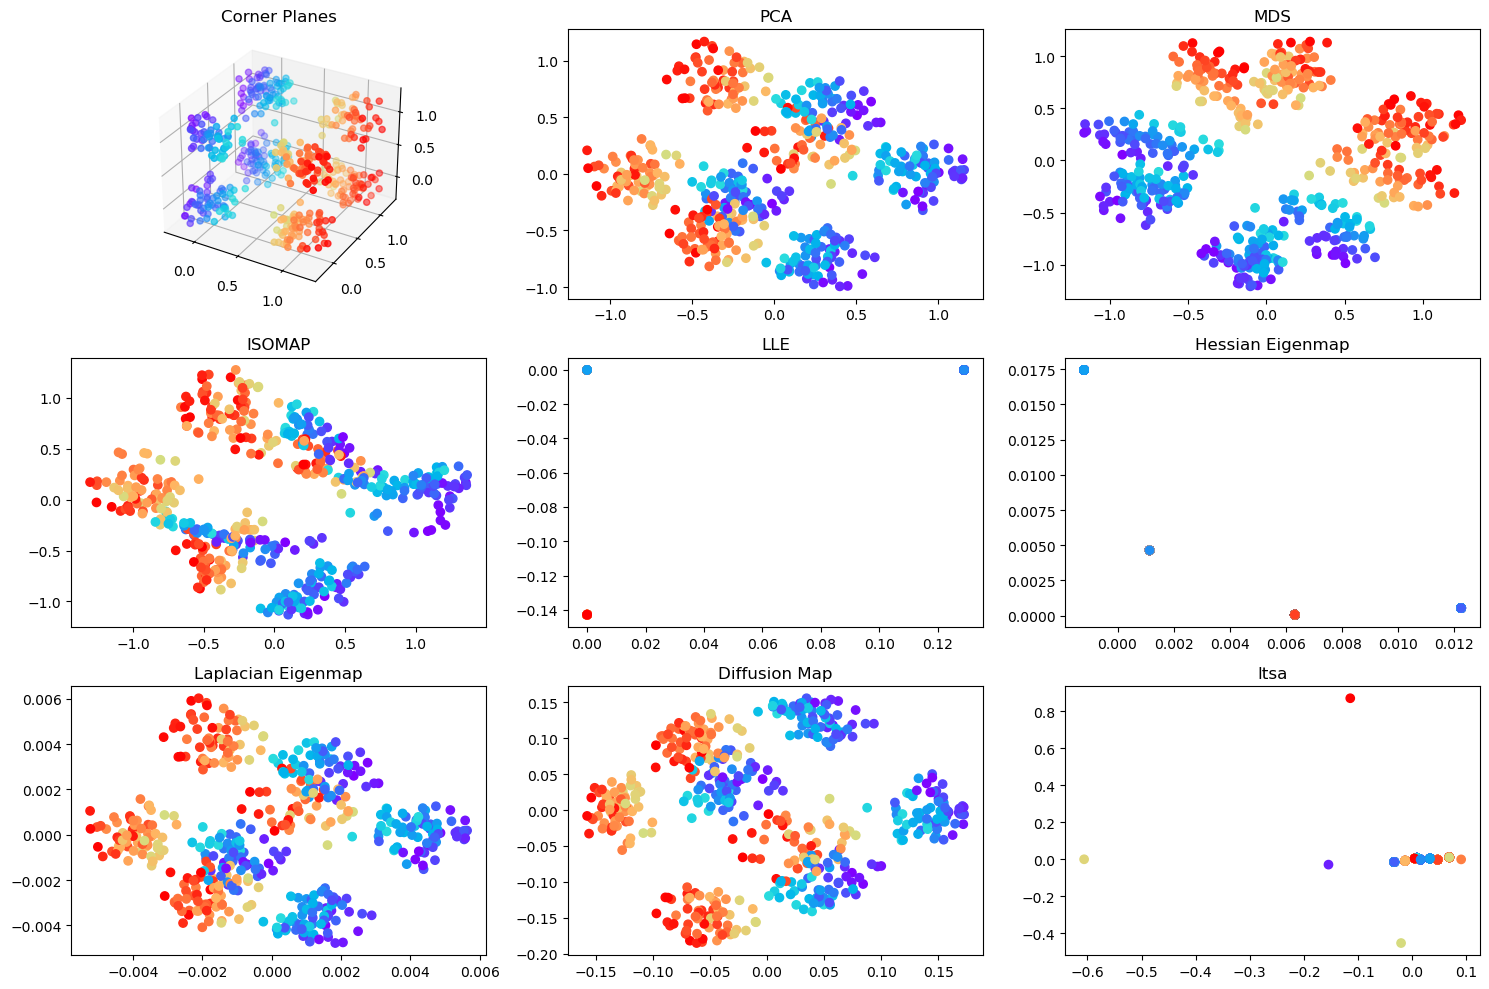

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\f\anaconda\envs\mdn\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\f\anaconda\envs\mdn\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\f\

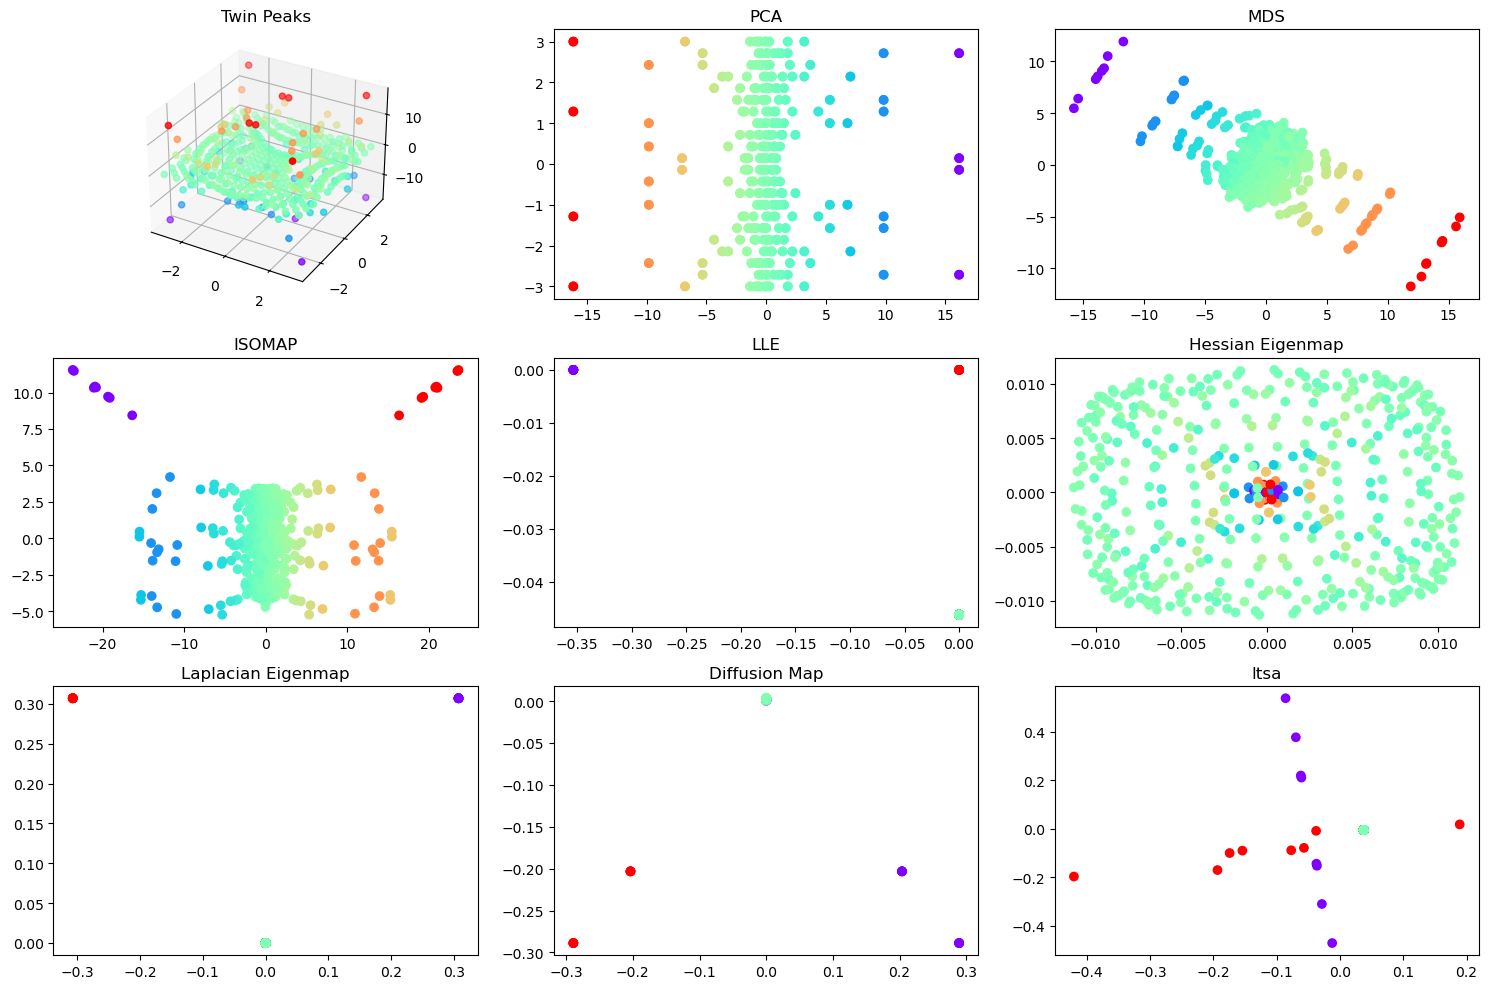

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\f\anaconda\envs\mdn\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\f\anaconda\envs\mdn\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
d:\f\

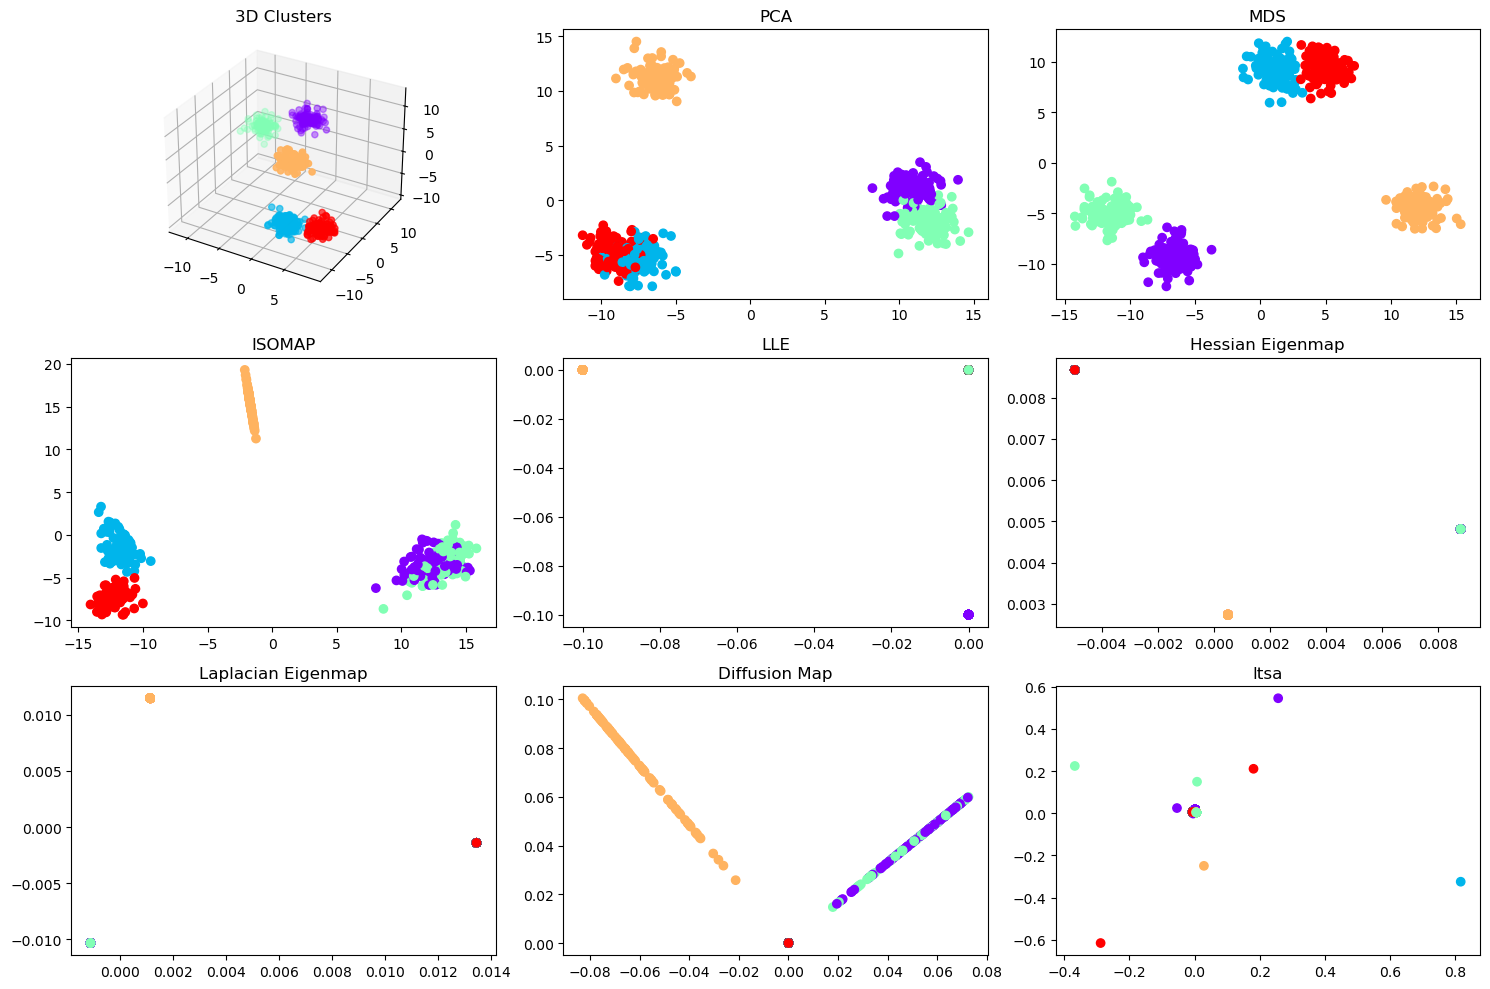

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


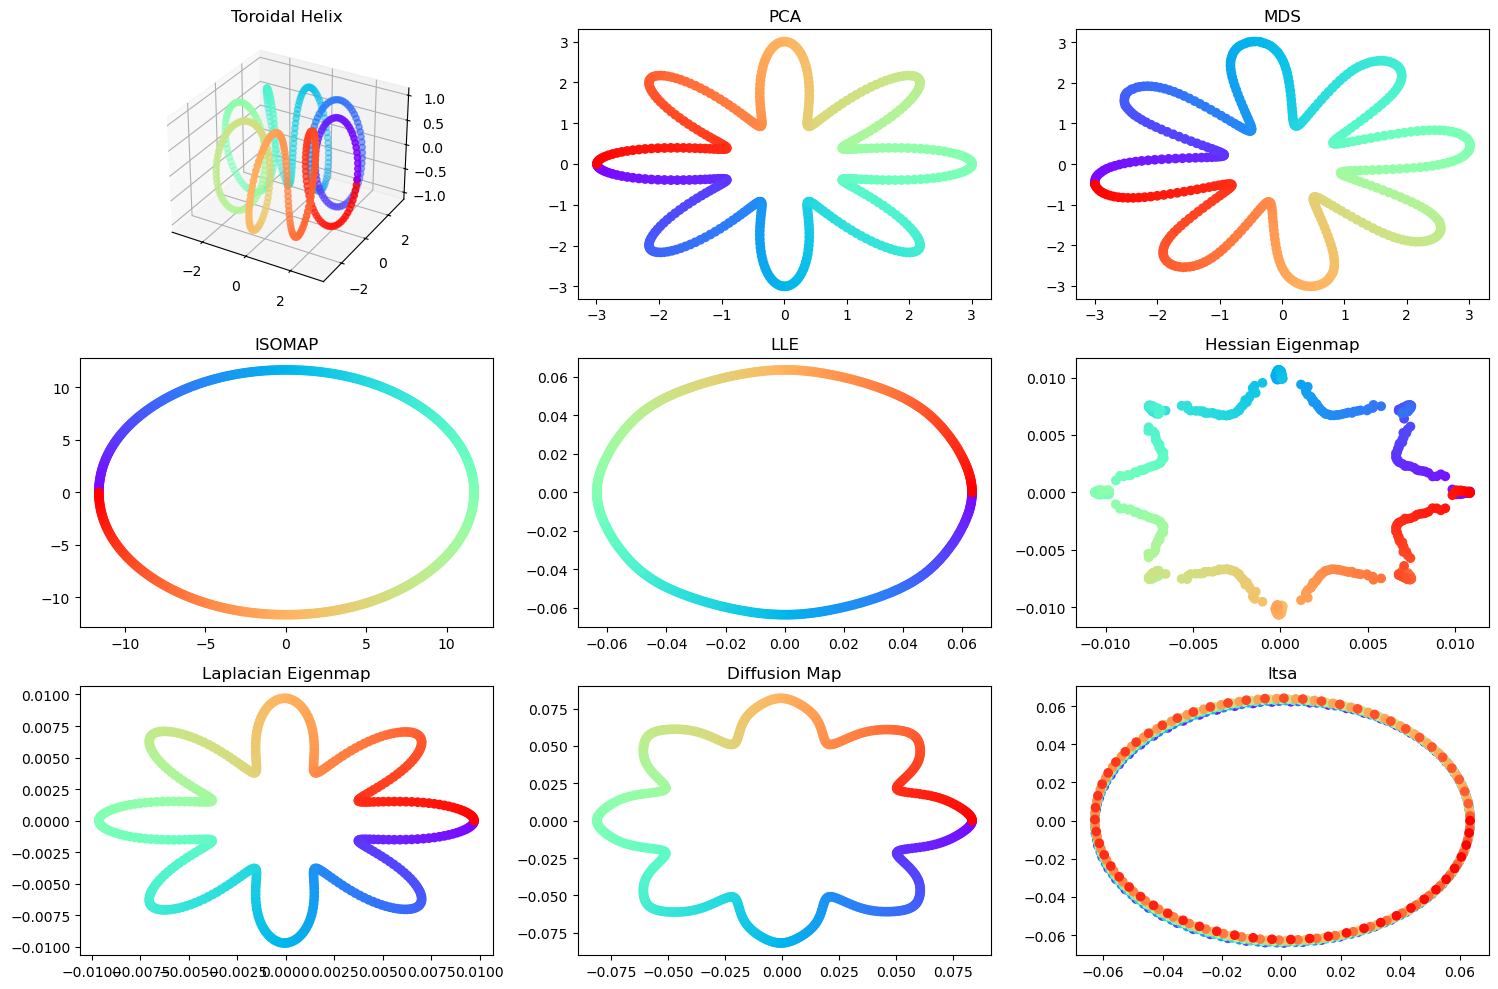

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


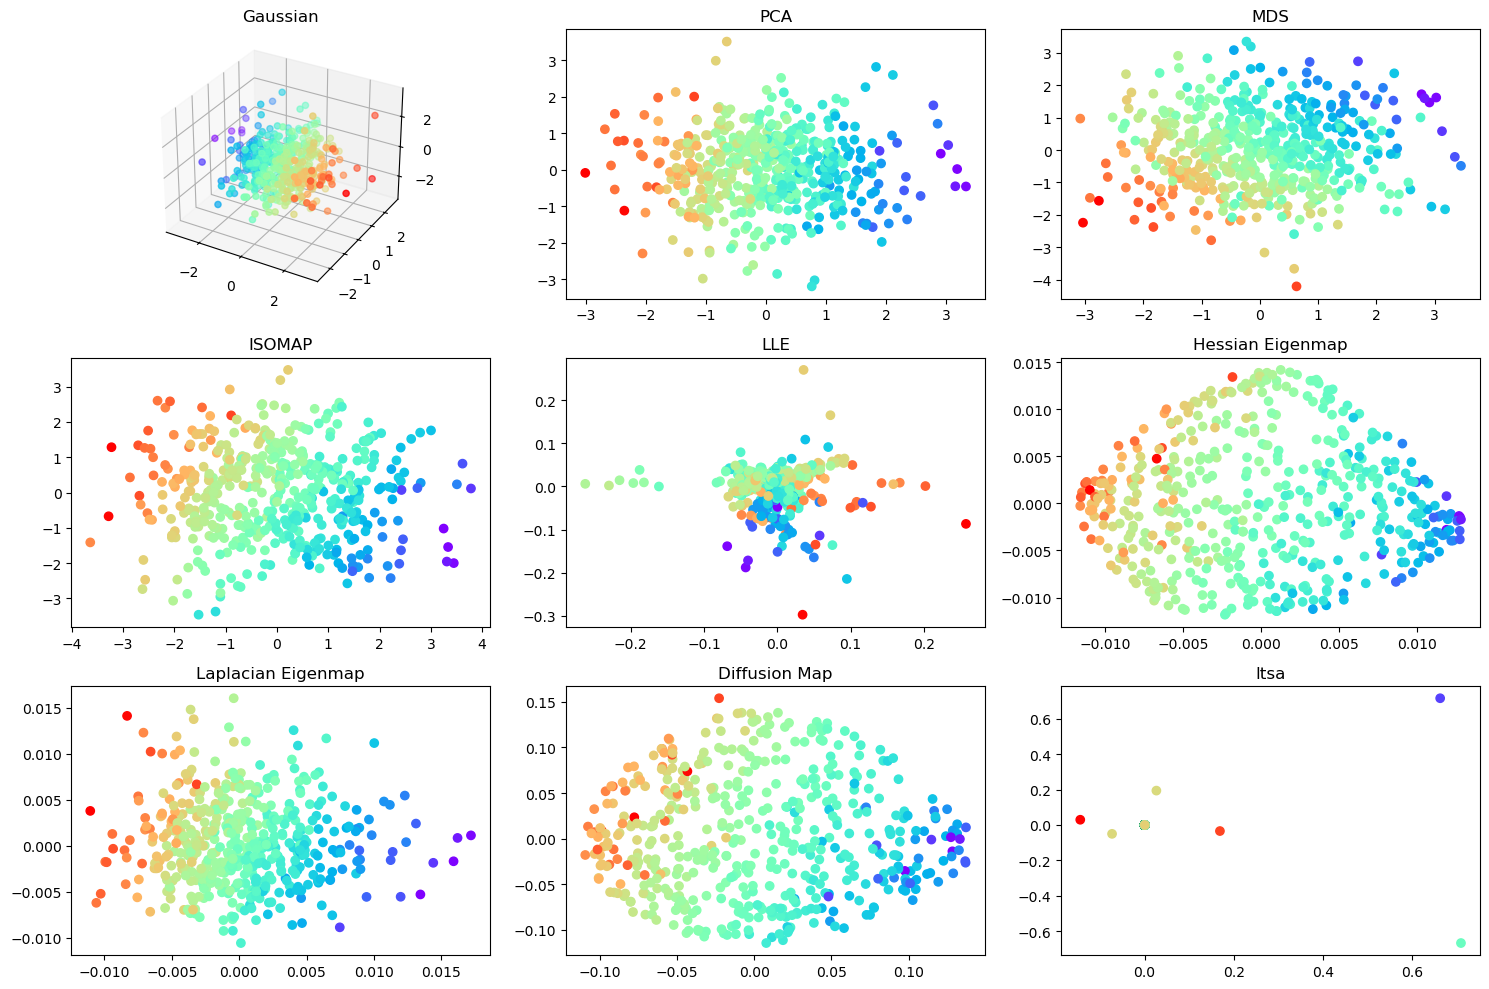

d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
d:\f\anaconda\envs\mdn\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\f\anaconda\envs\mdn\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


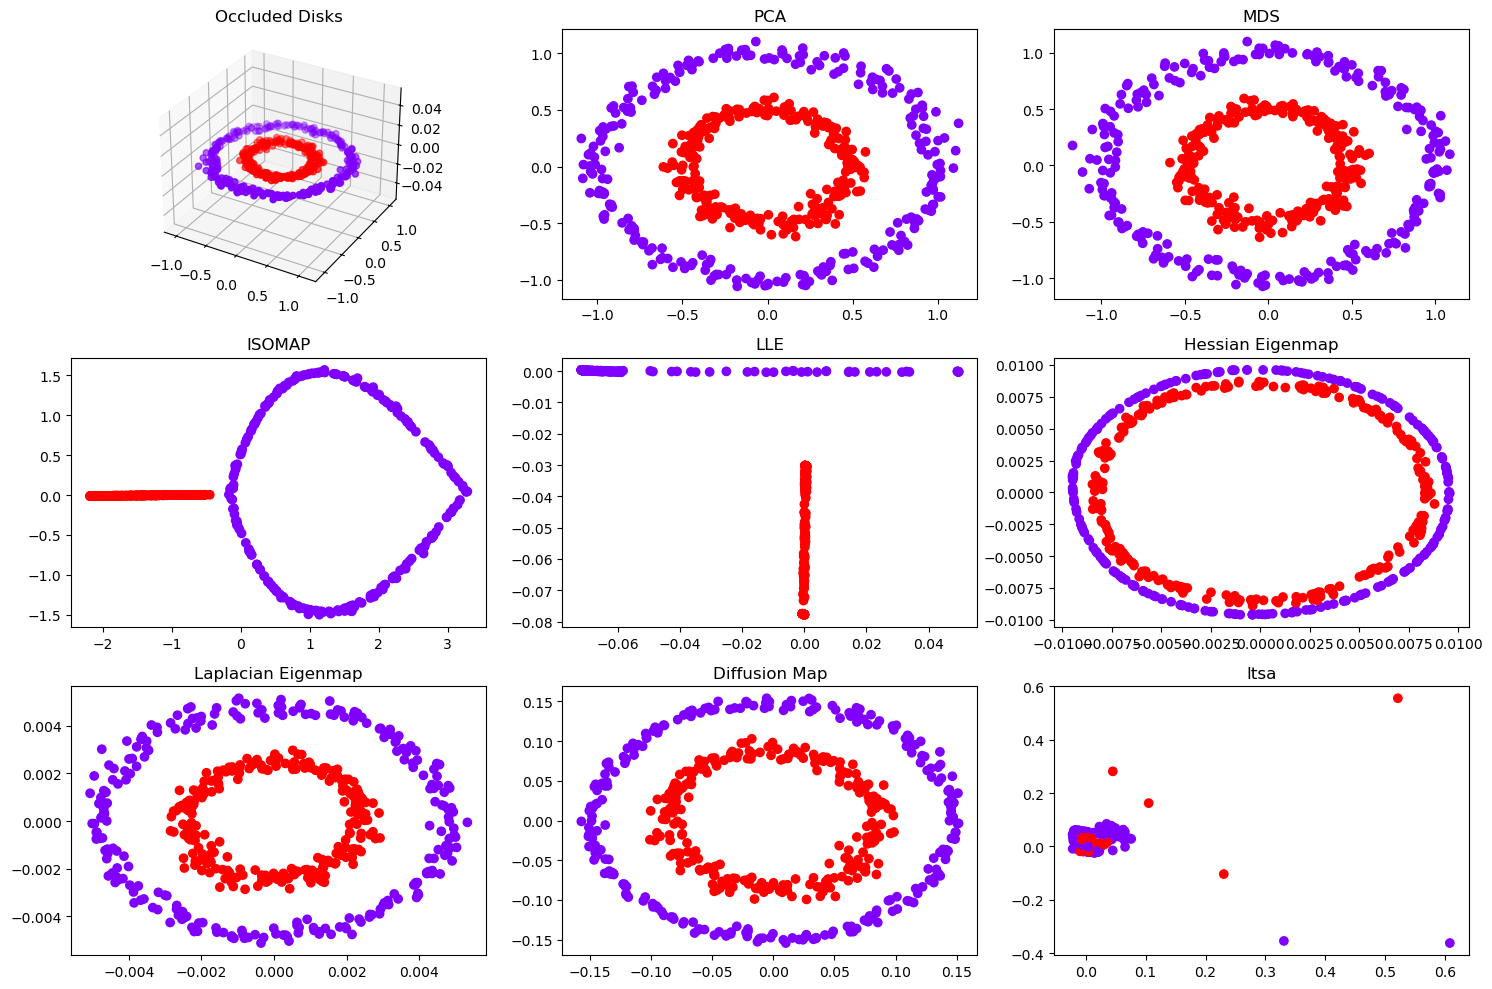

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, SpectralEmbedding
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances


# Visualize the datasets
datasets_list = [X_swiss_roll, X_swiss_hole, X_corner_planes,
                 X_twin_peaks, X_clusters, X_toroidal_helix, X_gaussian, X_occluded_disks]
titles = ['Swiss Roll', 'Swiss Hole', 'Corner Planes',
          'Twin Peaks', '3D Clusters', 'Toroidal Helix', 'Gaussian', 'Occluded Disks']
colors_list = [color_swiss_roll, color_swiss_hole, color_corner_planes, 
               color_twin_peaks, color_clusters, color_toroidal_helix, 
               color_gaussian, color_occluded_disks]


for i, (X, color, title) in enumerate(zip(datasets_list, colors_list, titles), start=1):

    # Step 3: Implement the algorithms

    # PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)


    # MDS
    mds = MDS(n_components=2)
    X_mds = mds.fit_transform(X)

    # ISOMAP
    isomap = Isomap(n_components=2)
    X_isomap = isomap.fit_transform(X)


    # LLE
    lle = LocallyLinearEmbedding(n_components=2)
    X_lle = lle.fit_transform(X)

    # Hessian Eigenmap
    hessian = SpectralEmbedding(n_components=2, affinity='nearest_neighbors')
    X_hessian = hessian.fit_transform(X)

    # Laplacian Eigenmap
    laplacian = SpectralEmbedding(n_components=2, affinity='rbf')
    X_laplacian = laplacian.fit_transform(X)

    # LTSA
    ltsa = LocallyLinearEmbedding(n_components=2, method='ltsa', eigen_solver='dense')
    X_ltsa = ltsa.fit_transform(X)


    # Diffusion Map
    def diffusion_map(X, t=1, d=2):
        D = pairwise_distances(X, squared=True)
        W = np.exp(-D / (2 * t))
        D_inv_sqrt = np.diag(1 / np.sqrt(np.sum(W, axis=1)))
        K = D_inv_sqrt @ W @ D_inv_sqrt
        eigvals, eigvecs = np.linalg.eigh(K)
        indices = np.argsort(eigvals)[::-1]
        eigvals = eigvals[indices]
        eigvecs = eigvecs[:, indices]
        psi = eigvecs[:, 1:d+1] / np.sqrt(eigvals[1:d+1])
        return psi

    X_diffusion = diffusion_map(X, t=1, d=2)


    # Step 5: Visualize the results
    fig = plt.figure(figsize=(15, 10))

    if X.shape[1] == 3:
        # Original Data
        ax = fig.add_subplot(3, 3, 1, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='rainbow')
        ax.set_title(title)

        # PCA
        ax = fig.add_subplot(3, 3, 2)
        ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap='rainbow')
        ax.set_title("PCA")

        # MDS
        ax = fig.add_subplot(3, 3, 3)
        ax.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap='rainbow')
        ax.set_title("MDS")

        # ISOMAP
        ax = fig.add_subplot(3, 3, 4)
        ax.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap='rainbow')
        ax.set_title("ISOMAP")

        # LLE
        ax = fig.add_subplot(3, 3, 5)
        ax.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap='rainbow')
        ax.set_title("LLE")

        # Hessian Eigenmap
        ax = fig.add_subplot(3, 3, 6)
        ax.scatter(X_hessian[:, 0], X_hessian[:, 1], c=color, cmap='rainbow')
        ax.set_title("Hessian Eigenmap")

        # Laplacian Eigenmap
        ax = fig.add_subplot(3, 3, 7)
        ax.scatter(X_laplacian[:, 0], X_laplacian[:, 1], c=color, cmap='rainbow')
        ax.set_title("Laplacian Eigenmap")

        # Diffusion Map
        ax = fig.add_subplot(3, 3, 8)
        ax.scatter(X_diffusion[:, 0], X_diffusion[:, 1], c=color, cmap='rainbow')
        ax.set_title("Diffusion Map")

        # ltsa
        ax = fig.add_subplot(3, 3, 9)
        ax.scatter(X_ltsa[:, 0], X_ltsa[:, 1], c=color, cmap='rainbow')
        ax.set_title("ltsa")

    elif X.shape[1] == 2:
         # Original Data
        ax = fig.add_subplot(3, 3, 1, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], np.zeros(X.shape[0]), c=color, cmap='rainbow')
        ax.set_title(title)

        # PCA
        ax = fig.add_subplot(3, 3, 2)
        ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap='rainbow')
        ax.set_title("PCA")

        # MDS
        ax = fig.add_subplot(3, 3, 3)
        ax.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap='rainbow')
        ax.set_title("MDS")

        # ISOMAP
        ax = fig.add_subplot(3, 3, 4)
        ax.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap='rainbow')
        ax.set_title("ISOMAP")

        # LLE
        ax = fig.add_subplot(3, 3, 5)
        ax.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap='rainbow')
        ax.set_title("LLE")

        # Hessian Eigenmap
        ax = fig.add_subplot(3, 3, 6)
        ax.scatter(X_hessian[:, 0], X_hessian[:, 1], c=color, cmap='rainbow')
        ax.set_title("Hessian Eigenmap")

        # Laplacian Eigenmap
        ax = fig.add_subplot(3, 3, 7)
        ax.scatter(X_laplacian[:, 0], X_laplacian[:, 1], c=color, cmap='rainbow')
        ax.set_title("Laplacian Eigenmap")

        # Diffusion Map
        ax = fig.add_subplot(3, 3, 8)
        ax.scatter(X_diffusion[:, 0], X_diffusion[:, 1], c=color, cmap='rainbow')
        ax.set_title("Diffusion Map")

        # ltsa
        ax = fig.add_subplot(3, 3, 9)
        ax.scatter(X_ltsa[:, 0], X_ltsa[:, 1], c=color, cmap='rainbow')
        ax.set_title("ltsa")       

    plt.tight_layout()
    plt.show()
